# Caio Henrique , N USP: 10235481

In [1]:
#pacotes e arquivo usados
import matplotlib.pyplot as plt 
import eli5
import pandas as pd
import numpy as np
import seaborn as sns
from eli5.permutation_importance import get_score_importances
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
df = pd.read_excel('C:/Users/9900Ks/Downloads/esforco.xls',sheet_name="Sheet1")

# 1. Problema 21 do Capıtulo 3.

In [2]:
x1 = (6*10 + 12*4 + 14*1 + 16*4 + 18*6)/(6+4+1+4+6)

In [3]:
x1

14.0

In [4]:
x2 = (12*7 + 14*7 +16*7)/(7+7+7)

In [5]:
x2

14.0

"""
Alternativa D está correta,fazendo uma média ponderada podemos ver que a média entre as duas amostras é igual,

Porém ao olharmos o histograma podemos ver que a variância em R1 é maior

"""

2. Problema 25 do Capitulo 3

(array([82., 71., 68., 56., 43., 15.]),
 array([  0, 100, 200, 300, 400, 500, 800]),
 <BarContainer object of 6 artists>)

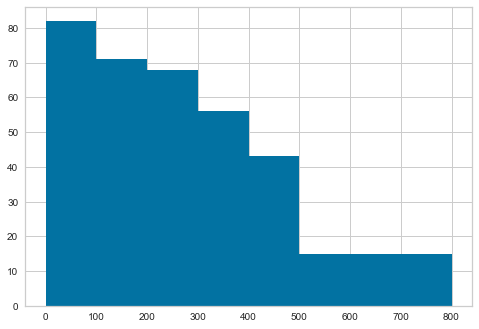

In [6]:
counts = [82,71,68,56,43,15]
bins = [0,100,200,300,400,500,800]

plt.hist(bins[:-1], bins, weights=counts)

3. Problema 18 do Cap´ıtulo 4.


"""
A) os normais,devido ao desvio padrão mais alto






"""

4. Problema 12 do Cap´ıtulo 6.

"""

alternativa D, pois nos extremos do gráfico qq,os erros estão fora do intervalo de confiança,pois a cauda da normal não é pesada o suficiente,

curtose maior do que a distribuição normal

"""

# 5. Problema 17 do Capıtulo 6.


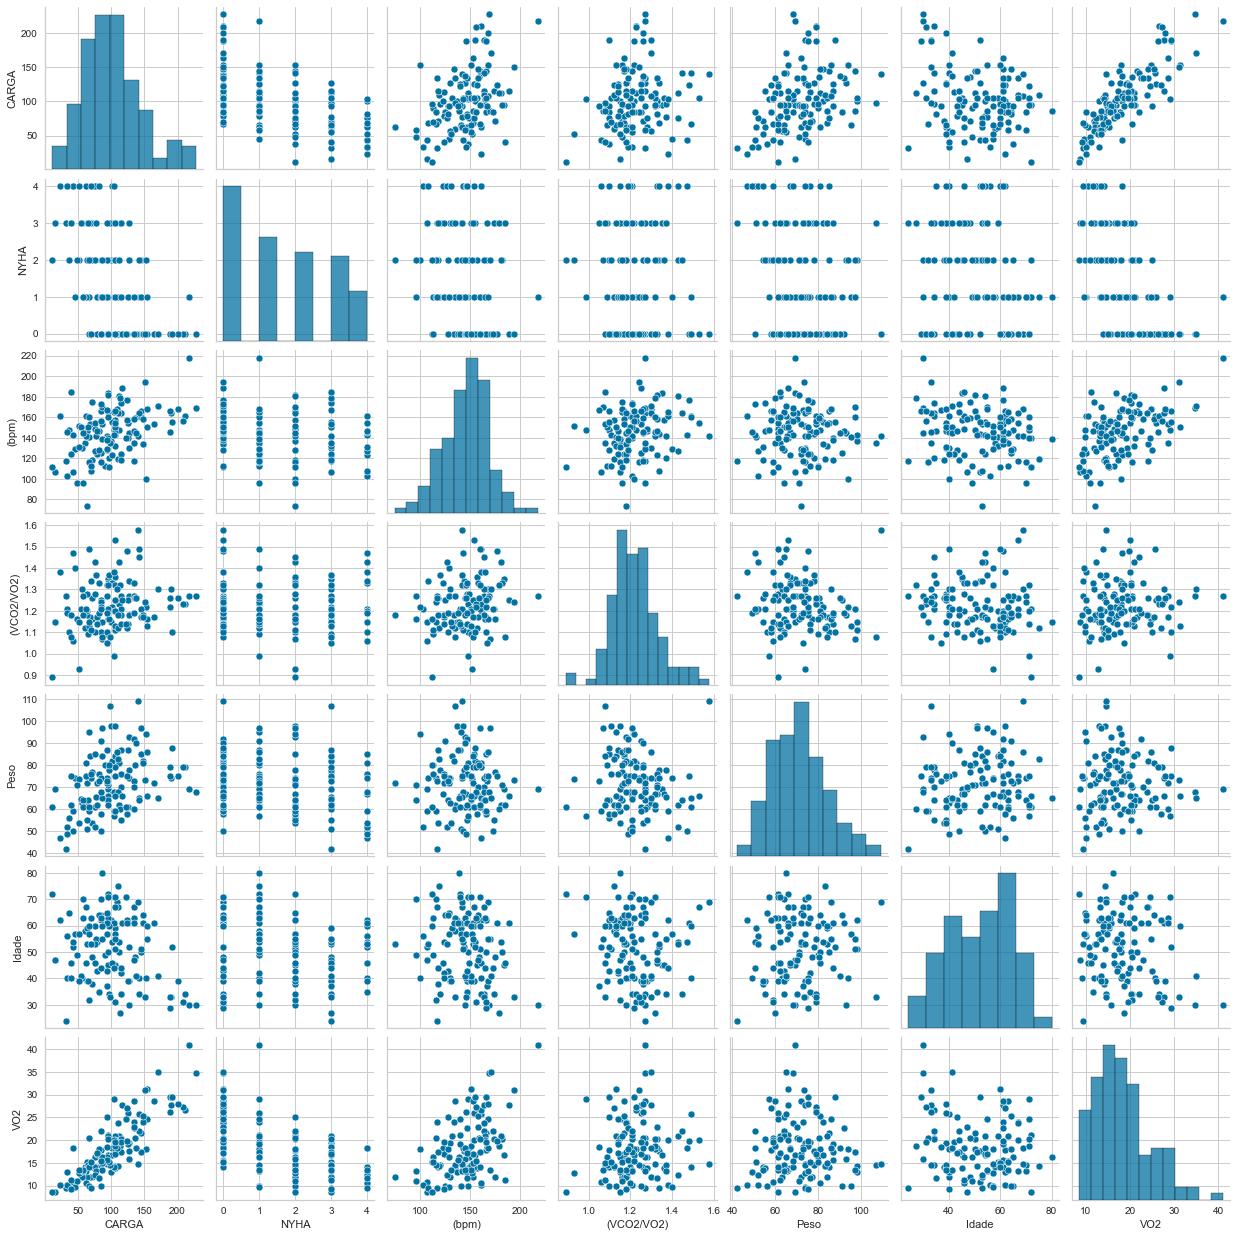

In [7]:
sns.pairplot(df)

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.replace({"Sexo":{"M":0,"F":1}},inplace=True)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numeric_features.drop("Sexo")


Index(['CARGA', 'NYHA', '(bpm)', '(VCO2/VO2)', 'Peso', 'Idade'], dtype='object')

In [9]:
categorical_features

Index([], dtype='object')

In [10]:

# create a transformer for the categorical values

#categorical_transformer = Pipeline(steps=[
#    ('one_hot', LabelEncoder())])


#categorical_transformer = Pipeline(steps=[
    #('one_hot', OneHotEncoder())])

# create a transformed for the numerical values
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])




preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('cat', categorical_transformer, categorical_features)
    ])
preprocessor = Pipeline(steps=[('preprocessor', preprocessor),
                      ])

In [11]:
X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
y_pred = linear_regressor.predict(X_test)

In [12]:
numeric_features.drop("Sexo")

Index(['CARGA', 'NYHA', '(bpm)', '(VCO2/VO2)', 'Peso', 'Idade'], dtype='object')

# Métricas Primeira Tentativa 

In [13]:
print(f"mean_squared_error:{mean_squared_error(y_test,y_pred)} , R^2 : {r2_score(y_test,y_pred)}")

mean_squared_error:2.9235054283494133 , R^2 : 0.9261705914272523


In [14]:
#onehot_columns = list(preprocessor.named_steps['preprocessor'].named_transformers_['cat'].named_steps['one_hot'].get_feature_names(input_features=categorical_features))

numeric_features_list = list(numeric_features)
#numeric_features_list.extend(onehot_columns)

#Pesos

In [15]:
# pesos da regressão
eli5.explain_weights(linear_regressor,feature_names=numeric_features_list)

Weight?,Feature
+18.365,<BIAS>
+5.361,CARGA
+0.798,(bpm)
+0.228,Idade
-0.689,Sexo
-0.954,NYHA
-1.089,(VCO2/VO2)
-2.521,Peso


# Relevância para o modelo

In [16]:
from sklearn.metrics import mean_squared_error
permu = eli5.sklearn.PermutationImportance(linear_regressor)
permu.fit(X_test,y_test)
eli5.show_weights(permu,feature_names=numeric_features_list)

Weight,Feature
1.1515 ± 0.2669,CARGA
0.2267 ± 0.0585,Peso
0.0591 ± 0.0282,(VCO2/VO2)
0.0517 ± 0.0253,NYHA
0.0286 ± 0.0137,Sexo
0.0221 ± 0.0250,(bpm)
0.0064 ± 0.0082,Idade


# Análise dos Resíduos

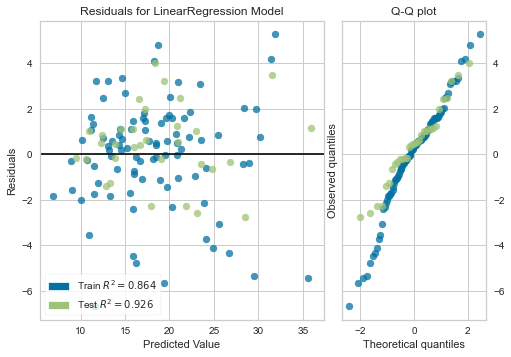

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [17]:
visualizer = ResidualsPlot(linear_regressor, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# repetindo os passos para um modelo sem as colunas de idade e sexo

In [18]:
df_2 = df.drop(columns=["Sexo","Idade"])

In [19]:
X = df_2.iloc[:, :-1]
y = df_2.iloc[:, -1]
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns
# create a transformer for the categorical values
categorical_transformer = Pipeline(steps=[
    ('one_hot', OneHotEncoder())])

# create a transformed for the numerical values
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])




preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor= Pipeline(steps=[('preprocessor', preprocessor),
                      ])

X = preprocessor.fit_transform(X)
linear_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
linear_reg.fit(X_train,y_train)
y_pred = linear_reg.predict(X_test)

In [20]:
print(f"mean_squared_error:{mean_squared_error(y_test,y_pred)} , R^2 : {r2_score(y_test,y_pred)}")

mean_squared_error:3.3420089383332936 , R^2 : 0.915601817951373


In [21]:
# pesos da regressão
numeric_features_list = list(numeric_features)
eli5.explain_weights(linear_reg,feature_names=numeric_features_list)

Weight?,Feature
+18.366,<BIAS>
+5.638,CARGA
+0.659,(bpm)
-0.855,NYHA
-0.969,(VCO2/VO2)
-2.501,Peso


In [22]:
Permu = eli5.sklearn.PermutationImportance(linear_reg)
Permu.fit(X_test,y_test)
eli5.show_weights(Permu,feature_names=numeric_features_list)

Weight,Feature
1.4540 ± 0.4266,CARGA
0.1974 ± 0.0692,Peso
0.0461 ± 0.0283,NYHA
0.0433 ± 0.0254,(VCO2/VO2)
0.0213 ± 0.0269,(bpm)


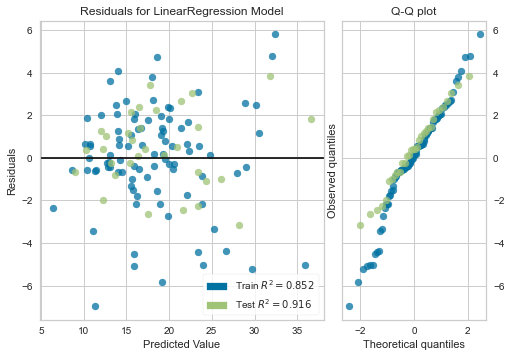

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
visualizer = ResidualsPlot(linear_reg, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()